In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from load_logs import *
from evaluation import *
from features import *
from visualize import *

In [3]:
logs, log_labels = read_logs_and_labels("./Saved/logs.txt", "./Saved/labels.txt")

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

## Grid Search

In [6]:
metrics = ["euclidean", "cosine"] #"brute" and "auto" were presenting the exact same results.
#leaf_size = [10, 20, 30, 40, 50] #all leaf sizes were prducing the same results
eps = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples = [100, 200, 300, 400, 500]

In [7]:
def grid_search(logs, labels_, gram, min_df):
     
    X = get_features(logs, gram, min_df)
    X = X.toarray()
    
    idxs = np.where(np.all(X == 0, axis=1))
    
    X = np.delete(X, idxs, axis=0)
    labels_ = np.delete(labels_, idxs)
    
    result_header = ["Metrics", "Eps", "Min Samples", "VMeasure", "Fowlkes-Mallows", "Clusters (No)"]
    results = []
    
    labels = []
    ls = 0
    
    for metric in metrics:
        for ep in eps:
            for min_s in min_samples:
                model = DBSCAN(eps=ep,min_samples=min_s,algorithm="auto",metric=metric)
                model.fit(X)

                labels = model.labels_

            #plt.figure()
            #plt.suptitle("DBSCAN(gram=%d,eps=%d,min_samples=%d,leaf_size=%d,algorithm=%s)" % (gram,ep,min_s,ls,alg), size=14)

                vm = evaluate_vmeasure(labels_, labels)
                fm = evaluate_fm(labels_, labels)

                lst1 = set(labels)

                result = [metric, ep, min_s, vm, fm, len(lst1)-1]
                results.append(result)
                tab_results(result_header, results) 

                
    tab_results(result_header, results)         
            

In [8]:
grid_search(logs, log_labels, 2, 70)

+-----------+-----+-------------+-------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |      VMeasure     |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+-------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.390283526166163 | 0.27227451753577186 |       41      |
+-----------+-----+-------------+-------------------+---------------------+---------------+
+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.390283526166163  | 0.27227451753577186 |       41      |
| euclidean | 0.1 |     200     | 0.28368809237679893 |  0.2973811691011676 |       14      |
+-----------+-----+-------------+---------------------+---------------

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.390283526166163  | 0.27227451753577186 |       41      |
| euclidean | 0.1 |     200     | 0.28368809237679893 |  0.2973811691011676 |       14      |
| euclidean | 0.1 |     300     | 0.22472418380065268 | 0.30201808650755835 |       9       |
| euclidean | 0.1 |     400     | 0.08150565926489867 | 0.31600336162663384 |       2       |
| euclidean | 0.1 |     500     | 0.04586397669740901 |  0.3181416004647193 |       1       |
| euclidean | 0.2 |     100     | 0.42808427167095564 | 0.26223011977594496 |       45      |
| euclidean | 0.2 |     200     |  0.3316782269602686 |  0.2982249895455641 |       16      |
| euclidean | 0.2 |     300     |  0.2682813974055752 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.390283526166163  | 0.27227451753577186 |       41      |
| euclidean | 0.1 |     200     | 0.28368809237679893 |  0.2973811691011676 |       14      |
| euclidean | 0.1 |     300     | 0.22472418380065268 | 0.30201808650755835 |       9       |
| euclidean | 0.1 |     400     | 0.08150565926489867 | 0.31600336162663384 |       2       |
| euclidean | 0.1 |     500     | 0.04586397669740901 |  0.3181416004647193 |       1       |
| euclidean | 0.2 |     100     | 0.42808427167095564 | 0.26223011977594496 |       45      |
| euclidean | 0.2 |     200     |  0.3316782269602686 |  0.2982249895455641 |       16      |
| euclidean | 0.2 |     300     |  0.2682813974055752 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.390283526166163  | 0.27227451753577186 |       41      |
| euclidean | 0.1 |     200     | 0.28368809237679893 |  0.2973811691011676 |       14      |
| euclidean | 0.1 |     300     | 0.22472418380065268 | 0.30201808650755835 |       9       |
| euclidean | 0.1 |     400     | 0.08150565926489867 | 0.31600336162663384 |       2       |
| euclidean | 0.1 |     500     | 0.04586397669740901 |  0.3181416004647193 |       1       |
| euclidean | 0.2 |     100     | 0.42808427167095564 | 0.26223011977594496 |       45      |
| euclidean | 0.2 |     200     |  0.3316782269602686 |  0.2982249895455641 |       16      |
| euclidean | 0.2 |     300     |  0.2682813974055752 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.390283526166163  | 0.27227451753577186 |       41      |
| euclidean | 0.1 |     200     | 0.28368809237679893 |  0.2973811691011676 |       14      |
| euclidean | 0.1 |     300     | 0.22472418380065268 | 0.30201808650755835 |       9       |
| euclidean | 0.1 |     400     | 0.08150565926489867 | 0.31600336162663384 |       2       |
| euclidean | 0.1 |     500     | 0.04586397669740901 |  0.3181416004647193 |       1       |
| euclidean | 0.2 |     100     | 0.42808427167095564 | 0.26223011977594496 |       45      |
| euclidean | 0.2 |     200     |  0.3316782269602686 |  0.2982249895455641 |       16      |
| euclidean | 0.2 |     300     |  0.2682813974055752 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.390283526166163  | 0.27227451753577186 |       41      |
| euclidean | 0.1 |     200     | 0.28368809237679893 |  0.2973811691011676 |       14      |
| euclidean | 0.1 |     300     | 0.22472418380065268 | 0.30201808650755835 |       9       |
| euclidean | 0.1 |     400     | 0.08150565926489867 | 0.31600336162663384 |       2       |
| euclidean | 0.1 |     500     | 0.04586397669740901 |  0.3181416004647193 |       1       |
| euclidean | 0.2 |     100     | 0.42808427167095564 | 0.26223011977594496 |       45      |
| euclidean | 0.2 |     200     |  0.3316782269602686 |  0.2982249895455641 |       16      |
| euclidean | 0.2 |     300     |  0.2682813974055752 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.390283526166163  | 0.27227451753577186 |       41      |
| euclidean | 0.1 |     200     | 0.28368809237679893 |  0.2973811691011676 |       14      |
| euclidean | 0.1 |     300     | 0.22472418380065268 | 0.30201808650755835 |       9       |
| euclidean | 0.1 |     400     | 0.08150565926489867 | 0.31600336162663384 |       2       |
| euclidean | 0.1 |     500     | 0.04586397669740901 |  0.3181416004647193 |       1       |
| euclidean | 0.2 |     100     | 0.42808427167095564 | 0.26223011977594496 |       45      |
| euclidean | 0.2 |     200     |  0.3316782269602686 |  0.2982249895455641 |       16      |
| euclidean | 0.2 |     300     |  0.2682813974055752 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.390283526166163  | 0.27227451753577186 |       41      |
| euclidean | 0.1 |     200     | 0.28368809237679893 |  0.2973811691011676 |       14      |
| euclidean | 0.1 |     300     | 0.22472418380065268 | 0.30201808650755835 |       9       |
| euclidean | 0.1 |     400     | 0.08150565926489867 | 0.31600336162663384 |       2       |
| euclidean | 0.1 |     500     | 0.04586397669740901 |  0.3181416004647193 |       1       |
| euclidean | 0.2 |     100     | 0.42808427167095564 | 0.26223011977594496 |       45      |
| euclidean | 0.2 |     200     |  0.3316782269602686 |  0.2982249895455641 |       16      |
| euclidean | 0.2 |     300     |  0.2682813974055752 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.390283526166163  | 0.27227451753577186 |       41      |
| euclidean | 0.1 |     200     | 0.28368809237679893 |  0.2973811691011676 |       14      |
| euclidean | 0.1 |     300     | 0.22472418380065268 | 0.30201808650755835 |       9       |
| euclidean | 0.1 |     400     | 0.08150565926489867 | 0.31600336162663384 |       2       |
| euclidean | 0.1 |     500     | 0.04586397669740901 |  0.3181416004647193 |       1       |
| euclidean | 0.2 |     100     | 0.42808427167095564 | 0.26223011977594496 |       45      |
| euclidean | 0.2 |     200     |  0.3316782269602686 |  0.2982249895455641 |       16      |
| euclidean | 0.2 |     300     |  0.2682813974055752 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.390283526166163  | 0.27227451753577186 |       41      |
| euclidean | 0.1 |     200     | 0.28368809237679893 |  0.2973811691011676 |       14      |
| euclidean | 0.1 |     300     | 0.22472418380065268 | 0.30201808650755835 |       9       |
| euclidean | 0.1 |     400     | 0.08150565926489867 | 0.31600336162663384 |       2       |
| euclidean | 0.1 |     500     | 0.04586397669740901 |  0.3181416004647193 |       1       |
| euclidean | 0.2 |     100     | 0.42808427167095564 | 0.26223011977594496 |       45      |
| euclidean | 0.2 |     200     |  0.3316782269602686 |  0.2982249895455641 |       16      |
| euclidean | 0.2 |     300     |  0.2682813974055752 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.390283526166163  | 0.27227451753577186 |       41      |
| euclidean | 0.1 |     200     | 0.28368809237679893 |  0.2973811691011676 |       14      |
| euclidean | 0.1 |     300     | 0.22472418380065268 | 0.30201808650755835 |       9       |
| euclidean | 0.1 |     400     | 0.08150565926489867 | 0.31600336162663384 |       2       |
| euclidean | 0.1 |     500     | 0.04586397669740901 |  0.3181416004647193 |       1       |
| euclidean | 0.2 |     100     | 0.42808427167095564 | 0.26223011977594496 |       45      |
| euclidean | 0.2 |     200     |  0.3316782269602686 |  0.2982249895455641 |       16      |
| euclidean | 0.2 |     300     |  0.2682813974055752 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.390283526166163  | 0.27227451753577186 |       41      |
| euclidean | 0.1 |     200     | 0.28368809237679893 |  0.2973811691011676 |       14      |
| euclidean | 0.1 |     300     | 0.22472418380065268 | 0.30201808650755835 |       9       |
| euclidean | 0.1 |     400     | 0.08150565926489867 | 0.31600336162663384 |       2       |
| euclidean | 0.1 |     500     | 0.04586397669740901 |  0.3181416004647193 |       1       |
| euclidean | 0.2 |     100     | 0.42808427167095564 | 0.26223011977594496 |       45      |
| euclidean | 0.2 |     200     |  0.3316782269602686 |  0.2982249895455641 |       16      |
| euclidean | 0.2 |     300     |  0.2682813974055752 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.390283526166163  | 0.27227451753577186 |       41      |
| euclidean | 0.1 |     200     | 0.28368809237679893 |  0.2973811691011676 |       14      |
| euclidean | 0.1 |     300     | 0.22472418380065268 | 0.30201808650755835 |       9       |
| euclidean | 0.1 |     400     | 0.08150565926489867 | 0.31600336162663384 |       2       |
| euclidean | 0.1 |     500     | 0.04586397669740901 |  0.3181416004647193 |       1       |
| euclidean | 0.2 |     100     | 0.42808427167095564 | 0.26223011977594496 |       45      |
| euclidean | 0.2 |     200     |  0.3316782269602686 |  0.2982249895455641 |       16      |
| euclidean | 0.2 |     300     |  0.2682813974055752 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.390283526166163  | 0.27227451753577186 |       41      |
| euclidean | 0.1 |     200     | 0.28368809237679893 |  0.2973811691011676 |       14      |
| euclidean | 0.1 |     300     | 0.22472418380065268 | 0.30201808650755835 |       9       |
| euclidean | 0.1 |     400     | 0.08150565926489867 | 0.31600336162663384 |       2       |
| euclidean | 0.1 |     500     | 0.04586397669740901 |  0.3181416004647193 |       1       |
| euclidean | 0.2 |     100     | 0.42808427167095564 | 0.26223011977594496 |       45      |
| euclidean | 0.2 |     200     |  0.3316782269602686 |  0.2982249895455641 |       16      |
| euclidean | 0.2 |     300     |  0.2682813974055752 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.390283526166163  | 0.27227451753577186 |       41      |
| euclidean | 0.1 |     200     | 0.28368809237679893 |  0.2973811691011676 |       14      |
| euclidean | 0.1 |     300     | 0.22472418380065268 | 0.30201808650755835 |       9       |
| euclidean | 0.1 |     400     | 0.08150565926489867 | 0.31600336162663384 |       2       |
| euclidean | 0.1 |     500     | 0.04586397669740901 |  0.3181416004647193 |       1       |
| euclidean | 0.2 |     100     | 0.42808427167095564 | 0.26223011977594496 |       45      |
| euclidean | 0.2 |     200     |  0.3316782269602686 |  0.2982249895455641 |       16      |
| euclidean | 0.2 |     300     |  0.2682813974055752 |  0.3

In [9]:
grid_search(logs, log_labels, 2, 100)

+-----------+-----+-------------+--------------------+--------------------+---------------+
|  Metrics  | Eps | Min Samples |      VMeasure      |  Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+--------------------+--------------------+---------------+
| euclidean | 0.1 |     100     | 0.3747944774365378 | 0.2639316838184836 |       41      |
+-----------+-----+-------------+--------------------+--------------------+---------------+
+-----------+-----+-------------+--------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |      VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+--------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.3747944774365378 |  0.2639316838184836 |       41      |
| euclidean | 0.1 |     200     | 0.2819319419666151 | 0.29712372401708226 |       14      |
+-----------+-----+-------------+--------------------+---------------------

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3747944774365378  |  0.2639316838184836 |       41      |
| euclidean | 0.1 |     200     |  0.2819319419666151  | 0.29712372401708226 |       14      |
| euclidean | 0.1 |     300     | 0.22411115663712194  | 0.30203687990286915 |       9       |
| euclidean | 0.1 |     400     | 0.08166721621702952  |  0.3160230452324557 |       2       |
| euclidean | 0.1 |     500     | 0.045951237351130735 | 0.31813957073863325 |       1       |
| euclidean | 0.2 |     100     | 0.43746390931942414  | 0.24328267581209945 |       53      |
| euclidean | 0.2 |     200     |  0.3390791014810471  |  0.3004003272383316 |       15      |
| euclidean | 0.2 |     300     | 0.27752976570705

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3747944774365378  |  0.2639316838184836 |       41      |
| euclidean | 0.1 |     200     |  0.2819319419666151  | 0.29712372401708226 |       14      |
| euclidean | 0.1 |     300     | 0.22411115663712194  | 0.30203687990286915 |       9       |
| euclidean | 0.1 |     400     | 0.08166721621702952  |  0.3160230452324557 |       2       |
| euclidean | 0.1 |     500     | 0.045951237351130735 | 0.31813957073863325 |       1       |
| euclidean | 0.2 |     100     | 0.43746390931942414  | 0.24328267581209945 |       53      |
| euclidean | 0.2 |     200     |  0.3390791014810471  |  0.3004003272383316 |       15      |
| euclidean | 0.2 |     300     | 0.27752976570705

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3747944774365378  |  0.2639316838184836 |       41      |
| euclidean | 0.1 |     200     |  0.2819319419666151  | 0.29712372401708226 |       14      |
| euclidean | 0.1 |     300     | 0.22411115663712194  | 0.30203687990286915 |       9       |
| euclidean | 0.1 |     400     | 0.08166721621702952  |  0.3160230452324557 |       2       |
| euclidean | 0.1 |     500     | 0.045951237351130735 | 0.31813957073863325 |       1       |
| euclidean | 0.2 |     100     | 0.43746390931942414  | 0.24328267581209945 |       53      |
| euclidean | 0.2 |     200     |  0.3390791014810471  |  0.3004003272383316 |       15      |
| euclidean | 0.2 |     300     | 0.27752976570705

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3747944774365378  |  0.2639316838184836 |       41      |
| euclidean | 0.1 |     200     |  0.2819319419666151  | 0.29712372401708226 |       14      |
| euclidean | 0.1 |     300     | 0.22411115663712194  | 0.30203687990286915 |       9       |
| euclidean | 0.1 |     400     | 0.08166721621702952  |  0.3160230452324557 |       2       |
| euclidean | 0.1 |     500     | 0.045951237351130735 | 0.31813957073863325 |       1       |
| euclidean | 0.2 |     100     | 0.43746390931942414  | 0.24328267581209945 |       53      |
| euclidean | 0.2 |     200     |  0.3390791014810471  |  0.3004003272383316 |       15      |
| euclidean | 0.2 |     300     | 0.27752976570705

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3747944774365378  |  0.2639316838184836 |       41      |
| euclidean | 0.1 |     200     |  0.2819319419666151  | 0.29712372401708226 |       14      |
| euclidean | 0.1 |     300     | 0.22411115663712194  | 0.30203687990286915 |       9       |
| euclidean | 0.1 |     400     | 0.08166721621702952  |  0.3160230452324557 |       2       |
| euclidean | 0.1 |     500     | 0.045951237351130735 | 0.31813957073863325 |       1       |
| euclidean | 0.2 |     100     | 0.43746390931942414  | 0.24328267581209945 |       53      |
| euclidean | 0.2 |     200     |  0.3390791014810471  |  0.3004003272383316 |       15      |
| euclidean | 0.2 |     300     | 0.27752976570705

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3747944774365378  |  0.2639316838184836 |       41      |
| euclidean | 0.1 |     200     |  0.2819319419666151  | 0.29712372401708226 |       14      |
| euclidean | 0.1 |     300     | 0.22411115663712194  | 0.30203687990286915 |       9       |
| euclidean | 0.1 |     400     | 0.08166721621702952  |  0.3160230452324557 |       2       |
| euclidean | 0.1 |     500     | 0.045951237351130735 | 0.31813957073863325 |       1       |
| euclidean | 0.2 |     100     | 0.43746390931942414  | 0.24328267581209945 |       53      |
| euclidean | 0.2 |     200     |  0.3390791014810471  |  0.3004003272383316 |       15      |
| euclidean | 0.2 |     300     | 0.27752976570705

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3747944774365378  |  0.2639316838184836 |       41      |
| euclidean | 0.1 |     200     |  0.2819319419666151  | 0.29712372401708226 |       14      |
| euclidean | 0.1 |     300     | 0.22411115663712194  | 0.30203687990286915 |       9       |
| euclidean | 0.1 |     400     | 0.08166721621702952  |  0.3160230452324557 |       2       |
| euclidean | 0.1 |     500     | 0.045951237351130735 | 0.31813957073863325 |       1       |
| euclidean | 0.2 |     100     | 0.43746390931942414  | 0.24328267581209945 |       53      |
| euclidean | 0.2 |     200     |  0.3390791014810471  |  0.3004003272383316 |       15      |
| euclidean | 0.2 |     300     | 0.27752976570705

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3747944774365378  |  0.2639316838184836 |       41      |
| euclidean | 0.1 |     200     |  0.2819319419666151  | 0.29712372401708226 |       14      |
| euclidean | 0.1 |     300     | 0.22411115663712194  | 0.30203687990286915 |       9       |
| euclidean | 0.1 |     400     | 0.08166721621702952  |  0.3160230452324557 |       2       |
| euclidean | 0.1 |     500     | 0.045951237351130735 | 0.31813957073863325 |       1       |
| euclidean | 0.2 |     100     | 0.43746390931942414  | 0.24328267581209945 |       53      |
| euclidean | 0.2 |     200     |  0.3390791014810471  |  0.3004003272383316 |       15      |
| euclidean | 0.2 |     300     | 0.27752976570705

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3747944774365378  |  0.2639316838184836 |       41      |
| euclidean | 0.1 |     200     |  0.2819319419666151  | 0.29712372401708226 |       14      |
| euclidean | 0.1 |     300     | 0.22411115663712194  | 0.30203687990286915 |       9       |
| euclidean | 0.1 |     400     | 0.08166721621702952  |  0.3160230452324557 |       2       |
| euclidean | 0.1 |     500     | 0.045951237351130735 | 0.31813957073863325 |       1       |
| euclidean | 0.2 |     100     | 0.43746390931942414  | 0.24328267581209945 |       53      |
| euclidean | 0.2 |     200     |  0.3390791014810471  |  0.3004003272383316 |       15      |
| euclidean | 0.2 |     300     | 0.27752976570705

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3747944774365378  |  0.2639316838184836 |       41      |
| euclidean | 0.1 |     200     |  0.2819319419666151  | 0.29712372401708226 |       14      |
| euclidean | 0.1 |     300     | 0.22411115663712194  | 0.30203687990286915 |       9       |
| euclidean | 0.1 |     400     | 0.08166721621702952  |  0.3160230452324557 |       2       |
| euclidean | 0.1 |     500     | 0.045951237351130735 | 0.31813957073863325 |       1       |
| euclidean | 0.2 |     100     | 0.43746390931942414  | 0.24328267581209945 |       53      |
| euclidean | 0.2 |     200     |  0.3390791014810471  |  0.3004003272383316 |       15      |
| euclidean | 0.2 |     300     | 0.27752976570705

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3747944774365378  |  0.2639316838184836 |       41      |
| euclidean | 0.1 |     200     |  0.2819319419666151  | 0.29712372401708226 |       14      |
| euclidean | 0.1 |     300     | 0.22411115663712194  | 0.30203687990286915 |       9       |
| euclidean | 0.1 |     400     | 0.08166721621702952  |  0.3160230452324557 |       2       |
| euclidean | 0.1 |     500     | 0.045951237351130735 | 0.31813957073863325 |       1       |
| euclidean | 0.2 |     100     | 0.43746390931942414  | 0.24328267581209945 |       53      |
| euclidean | 0.2 |     200     |  0.3390791014810471  |  0.3004003272383316 |       15      |
| euclidean | 0.2 |     300     | 0.27752976570705

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3747944774365378  |  0.2639316838184836 |       41      |
| euclidean | 0.1 |     200     |  0.2819319419666151  | 0.29712372401708226 |       14      |
| euclidean | 0.1 |     300     | 0.22411115663712194  | 0.30203687990286915 |       9       |
| euclidean | 0.1 |     400     | 0.08166721621702952  |  0.3160230452324557 |       2       |
| euclidean | 0.1 |     500     | 0.045951237351130735 | 0.31813957073863325 |       1       |
| euclidean | 0.2 |     100     | 0.43746390931942414  | 0.24328267581209945 |       53      |
| euclidean | 0.2 |     200     |  0.3390791014810471  |  0.3004003272383316 |       15      |
| euclidean | 0.2 |     300     | 0.27752976570705

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3747944774365378  |  0.2639316838184836 |       41      |
| euclidean | 0.1 |     200     |  0.2819319419666151  | 0.29712372401708226 |       14      |
| euclidean | 0.1 |     300     | 0.22411115663712194  | 0.30203687990286915 |       9       |
| euclidean | 0.1 |     400     | 0.08166721621702952  |  0.3160230452324557 |       2       |
| euclidean | 0.1 |     500     | 0.045951237351130735 | 0.31813957073863325 |       1       |
| euclidean | 0.2 |     100     | 0.43746390931942414  | 0.24328267581209945 |       53      |
| euclidean | 0.2 |     200     |  0.3390791014810471  |  0.3004003272383316 |       15      |
| euclidean | 0.2 |     300     | 0.27752976570705

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3747944774365378  |  0.2639316838184836 |       41      |
| euclidean | 0.1 |     200     |  0.2819319419666151  | 0.29712372401708226 |       14      |
| euclidean | 0.1 |     300     | 0.22411115663712194  | 0.30203687990286915 |       9       |
| euclidean | 0.1 |     400     | 0.08166721621702952  |  0.3160230452324557 |       2       |
| euclidean | 0.1 |     500     | 0.045951237351130735 | 0.31813957073863325 |       1       |
| euclidean | 0.2 |     100     | 0.43746390931942414  | 0.24328267581209945 |       53      |
| euclidean | 0.2 |     200     |  0.3390791014810471  |  0.3004003272383316 |       15      |
| euclidean | 0.2 |     300     | 0.27752976570705

In [9]:
grid_search(logs, log_labels, 3, 90)

+-----------+-----+-------------+---------------------+--------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |  Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+--------------------+---------------+
| euclidean | 0.1 |     100     | 0.39963577063221417 | 0.2653989941699533 |       45      |
+-----------+-----+-------------+---------------------+--------------------+---------------+
+-----------+-----+-------------+---------------------+--------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |  Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+--------------------+---------------+
| euclidean | 0.1 |     100     | 0.39963577063221417 | 0.2653989941699533 |       45      |
| euclidean | 0.1 |     200     | 0.28412281864773475 | 0.2972647640865993 |       14      |
+-----------+-----+-------------+---------------------+---------------

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.39963577063221417 |  0.2653989941699533 |       45      |
| euclidean | 0.1 |     200     | 0.28412281864773475 |  0.2972647640865993 |       14      |
| euclidean | 0.1 |     300     | 0.22510175771087026 | 0.30193070885713336 |       9       |
| euclidean | 0.1 |     400     | 0.08181523323096616 |  0.3160633464991031 |       2       |
| euclidean | 0.1 |     500     | 0.04603141193988209 |  0.318160586777921  |       1       |
| euclidean | 0.2 |     100     | 0.40938201071998204 | 0.26008020954461747 |       49      |
| euclidean | 0.2 |     200     | 0.28419972198009513 |  0.2972509846719656 |       14      |
| euclidean | 0.2 |     300     | 0.22519423592777918 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.39963577063221417 |  0.2653989941699533 |       45      |
| euclidean | 0.1 |     200     | 0.28412281864773475 |  0.2972647640865993 |       14      |
| euclidean | 0.1 |     300     | 0.22510175771087026 | 0.30193070885713336 |       9       |
| euclidean | 0.1 |     400     | 0.08181523323096616 |  0.3160633464991031 |       2       |
| euclidean | 0.1 |     500     | 0.04603141193988209 |  0.318160586777921  |       1       |
| euclidean | 0.2 |     100     | 0.40938201071998204 | 0.26008020954461747 |       49      |
| euclidean | 0.2 |     200     | 0.28419972198009513 |  0.2972509846719656 |       14      |
| euclidean | 0.2 |     300     | 0.22519423592777918 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.39963577063221417 |  0.2653989941699533 |       45      |
| euclidean | 0.1 |     200     | 0.28412281864773475 |  0.2972647640865993 |       14      |
| euclidean | 0.1 |     300     | 0.22510175771087026 | 0.30193070885713336 |       9       |
| euclidean | 0.1 |     400     | 0.08181523323096616 |  0.3160633464991031 |       2       |
| euclidean | 0.1 |     500     | 0.04603141193988209 |  0.318160586777921  |       1       |
| euclidean | 0.2 |     100     | 0.40938201071998204 | 0.26008020954461747 |       49      |
| euclidean | 0.2 |     200     | 0.28419972198009513 |  0.2972509846719656 |       14      |
| euclidean | 0.2 |     300     | 0.22519423592777918 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.39963577063221417 |  0.2653989941699533 |       45      |
| euclidean | 0.1 |     200     | 0.28412281864773475 |  0.2972647640865993 |       14      |
| euclidean | 0.1 |     300     | 0.22510175771087026 | 0.30193070885713336 |       9       |
| euclidean | 0.1 |     400     | 0.08181523323096616 |  0.3160633464991031 |       2       |
| euclidean | 0.1 |     500     | 0.04603141193988209 |  0.318160586777921  |       1       |
| euclidean | 0.2 |     100     | 0.40938201071998204 | 0.26008020954461747 |       49      |
| euclidean | 0.2 |     200     | 0.28419972198009513 |  0.2972509846719656 |       14      |
| euclidean | 0.2 |     300     | 0.22519423592777918 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.39963577063221417 |  0.2653989941699533 |       45      |
| euclidean | 0.1 |     200     | 0.28412281864773475 |  0.2972647640865993 |       14      |
| euclidean | 0.1 |     300     | 0.22510175771087026 | 0.30193070885713336 |       9       |
| euclidean | 0.1 |     400     | 0.08181523323096616 |  0.3160633464991031 |       2       |
| euclidean | 0.1 |     500     | 0.04603141193988209 |  0.318160586777921  |       1       |
| euclidean | 0.2 |     100     | 0.40938201071998204 | 0.26008020954461747 |       49      |
| euclidean | 0.2 |     200     | 0.28419972198009513 |  0.2972509846719656 |       14      |
| euclidean | 0.2 |     300     | 0.22519423592777918 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.39963577063221417 |  0.2653989941699533 |       45      |
| euclidean | 0.1 |     200     | 0.28412281864773475 |  0.2972647640865993 |       14      |
| euclidean | 0.1 |     300     | 0.22510175771087026 | 0.30193070885713336 |       9       |
| euclidean | 0.1 |     400     | 0.08181523323096616 |  0.3160633464991031 |       2       |
| euclidean | 0.1 |     500     | 0.04603141193988209 |  0.318160586777921  |       1       |
| euclidean | 0.2 |     100     | 0.40938201071998204 | 0.26008020954461747 |       49      |
| euclidean | 0.2 |     200     | 0.28419972198009513 |  0.2972509846719656 |       14      |
| euclidean | 0.2 |     300     | 0.22519423592777918 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.39963577063221417 |  0.2653989941699533 |       45      |
| euclidean | 0.1 |     200     | 0.28412281864773475 |  0.2972647640865993 |       14      |
| euclidean | 0.1 |     300     | 0.22510175771087026 | 0.30193070885713336 |       9       |
| euclidean | 0.1 |     400     | 0.08181523323096616 |  0.3160633464991031 |       2       |
| euclidean | 0.1 |     500     | 0.04603141193988209 |  0.318160586777921  |       1       |
| euclidean | 0.2 |     100     | 0.40938201071998204 | 0.26008020954461747 |       49      |
| euclidean | 0.2 |     200     | 0.28419972198009513 |  0.2972509846719656 |       14      |
| euclidean | 0.2 |     300     | 0.22519423592777918 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.39963577063221417 |  0.2653989941699533 |       45      |
| euclidean | 0.1 |     200     | 0.28412281864773475 |  0.2972647640865993 |       14      |
| euclidean | 0.1 |     300     | 0.22510175771087026 | 0.30193070885713336 |       9       |
| euclidean | 0.1 |     400     | 0.08181523323096616 |  0.3160633464991031 |       2       |
| euclidean | 0.1 |     500     | 0.04603141193988209 |  0.318160586777921  |       1       |
| euclidean | 0.2 |     100     | 0.40938201071998204 | 0.26008020954461747 |       49      |
| euclidean | 0.2 |     200     | 0.28419972198009513 |  0.2972509846719656 |       14      |
| euclidean | 0.2 |     300     | 0.22519423592777918 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.39963577063221417 |  0.2653989941699533 |       45      |
| euclidean | 0.1 |     200     | 0.28412281864773475 |  0.2972647640865993 |       14      |
| euclidean | 0.1 |     300     | 0.22510175771087026 | 0.30193070885713336 |       9       |
| euclidean | 0.1 |     400     | 0.08181523323096616 |  0.3160633464991031 |       2       |
| euclidean | 0.1 |     500     | 0.04603141193988209 |  0.318160586777921  |       1       |
| euclidean | 0.2 |     100     | 0.40938201071998204 | 0.26008020954461747 |       49      |
| euclidean | 0.2 |     200     | 0.28419972198009513 |  0.2972509846719656 |       14      |
| euclidean | 0.2 |     300     | 0.22519423592777918 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.39963577063221417 |  0.2653989941699533 |       45      |
| euclidean | 0.1 |     200     | 0.28412281864773475 |  0.2972647640865993 |       14      |
| euclidean | 0.1 |     300     | 0.22510175771087026 | 0.30193070885713336 |       9       |
| euclidean | 0.1 |     400     | 0.08181523323096616 |  0.3160633464991031 |       2       |
| euclidean | 0.1 |     500     | 0.04603141193988209 |  0.318160586777921  |       1       |
| euclidean | 0.2 |     100     | 0.40938201071998204 | 0.26008020954461747 |       49      |
| euclidean | 0.2 |     200     | 0.28419972198009513 |  0.2972509846719656 |       14      |
| euclidean | 0.2 |     300     | 0.22519423592777918 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.39963577063221417 |  0.2653989941699533 |       45      |
| euclidean | 0.1 |     200     | 0.28412281864773475 |  0.2972647640865993 |       14      |
| euclidean | 0.1 |     300     | 0.22510175771087026 | 0.30193070885713336 |       9       |
| euclidean | 0.1 |     400     | 0.08181523323096616 |  0.3160633464991031 |       2       |
| euclidean | 0.1 |     500     | 0.04603141193988209 |  0.318160586777921  |       1       |
| euclidean | 0.2 |     100     | 0.40938201071998204 | 0.26008020954461747 |       49      |
| euclidean | 0.2 |     200     | 0.28419972198009513 |  0.2972509846719656 |       14      |
| euclidean | 0.2 |     300     | 0.22519423592777918 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.39963577063221417 |  0.2653989941699533 |       45      |
| euclidean | 0.1 |     200     | 0.28412281864773475 |  0.2972647640865993 |       14      |
| euclidean | 0.1 |     300     | 0.22510175771087026 | 0.30193070885713336 |       9       |
| euclidean | 0.1 |     400     | 0.08181523323096616 |  0.3160633464991031 |       2       |
| euclidean | 0.1 |     500     | 0.04603141193988209 |  0.318160586777921  |       1       |
| euclidean | 0.2 |     100     | 0.40938201071998204 | 0.26008020954461747 |       49      |
| euclidean | 0.2 |     200     | 0.28419972198009513 |  0.2972509846719656 |       14      |
| euclidean | 0.2 |     300     | 0.22519423592777918 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.39963577063221417 |  0.2653989941699533 |       45      |
| euclidean | 0.1 |     200     | 0.28412281864773475 |  0.2972647640865993 |       14      |
| euclidean | 0.1 |     300     | 0.22510175771087026 | 0.30193070885713336 |       9       |
| euclidean | 0.1 |     400     | 0.08181523323096616 |  0.3160633464991031 |       2       |
| euclidean | 0.1 |     500     | 0.04603141193988209 |  0.318160586777921  |       1       |
| euclidean | 0.2 |     100     | 0.40938201071998204 | 0.26008020954461747 |       49      |
| euclidean | 0.2 |     200     | 0.28419972198009513 |  0.2972509846719656 |       14      |
| euclidean | 0.2 |     300     | 0.22519423592777918 |  0.3

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.39963577063221417 |  0.2653989941699533 |       45      |
| euclidean | 0.1 |     200     | 0.28412281864773475 |  0.2972647640865993 |       14      |
| euclidean | 0.1 |     300     | 0.22510175771087026 | 0.30193070885713336 |       9       |
| euclidean | 0.1 |     400     | 0.08181523323096616 |  0.3160633464991031 |       2       |
| euclidean | 0.1 |     500     | 0.04603141193988209 |  0.318160586777921  |       1       |
| euclidean | 0.2 |     100     | 0.40938201071998204 | 0.26008020954461747 |       49      |
| euclidean | 0.2 |     200     | 0.28419972198009513 |  0.2972509846719656 |       14      |
| euclidean | 0.2 |     300     | 0.22519423592777918 |  0.3

In [11]:
grid_search(logs, log_labels, 3, 100)

+-----------+-----+-------------+--------------------+--------------------+---------------+
|  Metrics  | Eps | Min Samples |      VMeasure      |  Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+--------------------+--------------------+---------------+
| euclidean | 0.1 |     100     | 0.3857745932273759 | 0.2607407031669453 |       44      |
+-----------+-----+-------------+--------------------+--------------------+---------------+
+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3857745932273759 |  0.2607407031669453 |       44      |
| euclidean | 0.1 |     200     | 0.28338286208069813 | 0.29585967694613724 |       14      |
+-----------+-----+-------------+---------------------+---------------

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3857745932273759  |  0.2607407031669453 |       44      |
| euclidean | 0.1 |     200     | 0.28338286208069813  | 0.29585967694613724 |       14      |
| euclidean | 0.1 |     300     | 0.22531096329465472  | 0.30104394211271934 |       9       |
| euclidean | 0.1 |     400     | 0.08225946996526612  |  0.3157193331930717 |       2       |
| euclidean | 0.1 |     500     | 0.04628842030028223  |  0.3179360429987532 |       1       |
| euclidean | 0.2 |     100     |  0.3998200848544297  | 0.25540410410339043 |       48      |
| euclidean | 0.2 |     200     | 0.28640591273523286  |  0.2961064503911576 |       14      |
| euclidean | 0.2 |     300     | 0.22858408990662

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3857745932273759  |  0.2607407031669453 |       44      |
| euclidean | 0.1 |     200     | 0.28338286208069813  | 0.29585967694613724 |       14      |
| euclidean | 0.1 |     300     | 0.22531096329465472  | 0.30104394211271934 |       9       |
| euclidean | 0.1 |     400     | 0.08225946996526612  |  0.3157193331930717 |       2       |
| euclidean | 0.1 |     500     | 0.04628842030028223  |  0.3179360429987532 |       1       |
| euclidean | 0.2 |     100     |  0.3998200848544297  | 0.25540410410339043 |       48      |
| euclidean | 0.2 |     200     | 0.28640591273523286  |  0.2961064503911576 |       14      |
| euclidean | 0.2 |     300     | 0.22858408990662

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3857745932273759  |  0.2607407031669453 |       44      |
| euclidean | 0.1 |     200     | 0.28338286208069813  | 0.29585967694613724 |       14      |
| euclidean | 0.1 |     300     | 0.22531096329465472  | 0.30104394211271934 |       9       |
| euclidean | 0.1 |     400     | 0.08225946996526612  |  0.3157193331930717 |       2       |
| euclidean | 0.1 |     500     | 0.04628842030028223  |  0.3179360429987532 |       1       |
| euclidean | 0.2 |     100     |  0.3998200848544297  | 0.25540410410339043 |       48      |
| euclidean | 0.2 |     200     | 0.28640591273523286  |  0.2961064503911576 |       14      |
| euclidean | 0.2 |     300     | 0.22858408990662

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3857745932273759  |  0.2607407031669453 |       44      |
| euclidean | 0.1 |     200     | 0.28338286208069813  | 0.29585967694613724 |       14      |
| euclidean | 0.1 |     300     | 0.22531096329465472  | 0.30104394211271934 |       9       |
| euclidean | 0.1 |     400     | 0.08225946996526612  |  0.3157193331930717 |       2       |
| euclidean | 0.1 |     500     | 0.04628842030028223  |  0.3179360429987532 |       1       |
| euclidean | 0.2 |     100     |  0.3998200848544297  | 0.25540410410339043 |       48      |
| euclidean | 0.2 |     200     | 0.28640591273523286  |  0.2961064503911576 |       14      |
| euclidean | 0.2 |     300     | 0.22858408990662

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3857745932273759  |  0.2607407031669453 |       44      |
| euclidean | 0.1 |     200     | 0.28338286208069813  | 0.29585967694613724 |       14      |
| euclidean | 0.1 |     300     | 0.22531096329465472  | 0.30104394211271934 |       9       |
| euclidean | 0.1 |     400     | 0.08225946996526612  |  0.3157193331930717 |       2       |
| euclidean | 0.1 |     500     | 0.04628842030028223  |  0.3179360429987532 |       1       |
| euclidean | 0.2 |     100     |  0.3998200848544297  | 0.25540410410339043 |       48      |
| euclidean | 0.2 |     200     | 0.28640591273523286  |  0.2961064503911576 |       14      |
| euclidean | 0.2 |     300     | 0.22858408990662

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3857745932273759  |  0.2607407031669453 |       44      |
| euclidean | 0.1 |     200     | 0.28338286208069813  | 0.29585967694613724 |       14      |
| euclidean | 0.1 |     300     | 0.22531096329465472  | 0.30104394211271934 |       9       |
| euclidean | 0.1 |     400     | 0.08225946996526612  |  0.3157193331930717 |       2       |
| euclidean | 0.1 |     500     | 0.04628842030028223  |  0.3179360429987532 |       1       |
| euclidean | 0.2 |     100     |  0.3998200848544297  | 0.25540410410339043 |       48      |
| euclidean | 0.2 |     200     | 0.28640591273523286  |  0.2961064503911576 |       14      |
| euclidean | 0.2 |     300     | 0.22858408990662

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3857745932273759  |  0.2607407031669453 |       44      |
| euclidean | 0.1 |     200     | 0.28338286208069813  | 0.29585967694613724 |       14      |
| euclidean | 0.1 |     300     | 0.22531096329465472  | 0.30104394211271934 |       9       |
| euclidean | 0.1 |     400     | 0.08225946996526612  |  0.3157193331930717 |       2       |
| euclidean | 0.1 |     500     | 0.04628842030028223  |  0.3179360429987532 |       1       |
| euclidean | 0.2 |     100     |  0.3998200848544297  | 0.25540410410339043 |       48      |
| euclidean | 0.2 |     200     | 0.28640591273523286  |  0.2961064503911576 |       14      |
| euclidean | 0.2 |     300     | 0.22858408990662

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3857745932273759  |  0.2607407031669453 |       44      |
| euclidean | 0.1 |     200     | 0.28338286208069813  | 0.29585967694613724 |       14      |
| euclidean | 0.1 |     300     | 0.22531096329465472  | 0.30104394211271934 |       9       |
| euclidean | 0.1 |     400     | 0.08225946996526612  |  0.3157193331930717 |       2       |
| euclidean | 0.1 |     500     | 0.04628842030028223  |  0.3179360429987532 |       1       |
| euclidean | 0.2 |     100     |  0.3998200848544297  | 0.25540410410339043 |       48      |
| euclidean | 0.2 |     200     | 0.28640591273523286  |  0.2961064503911576 |       14      |
| euclidean | 0.2 |     300     | 0.22858408990662

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3857745932273759  |  0.2607407031669453 |       44      |
| euclidean | 0.1 |     200     | 0.28338286208069813  | 0.29585967694613724 |       14      |
| euclidean | 0.1 |     300     | 0.22531096329465472  | 0.30104394211271934 |       9       |
| euclidean | 0.1 |     400     | 0.08225946996526612  |  0.3157193331930717 |       2       |
| euclidean | 0.1 |     500     | 0.04628842030028223  |  0.3179360429987532 |       1       |
| euclidean | 0.2 |     100     |  0.3998200848544297  | 0.25540410410339043 |       48      |
| euclidean | 0.2 |     200     | 0.28640591273523286  |  0.2961064503911576 |       14      |
| euclidean | 0.2 |     300     | 0.22858408990662

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3857745932273759  |  0.2607407031669453 |       44      |
| euclidean | 0.1 |     200     | 0.28338286208069813  | 0.29585967694613724 |       14      |
| euclidean | 0.1 |     300     | 0.22531096329465472  | 0.30104394211271934 |       9       |
| euclidean | 0.1 |     400     | 0.08225946996526612  |  0.3157193331930717 |       2       |
| euclidean | 0.1 |     500     | 0.04628842030028223  |  0.3179360429987532 |       1       |
| euclidean | 0.2 |     100     |  0.3998200848544297  | 0.25540410410339043 |       48      |
| euclidean | 0.2 |     200     | 0.28640591273523286  |  0.2961064503911576 |       14      |
| euclidean | 0.2 |     300     | 0.22858408990662

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3857745932273759  |  0.2607407031669453 |       44      |
| euclidean | 0.1 |     200     | 0.28338286208069813  | 0.29585967694613724 |       14      |
| euclidean | 0.1 |     300     | 0.22531096329465472  | 0.30104394211271934 |       9       |
| euclidean | 0.1 |     400     | 0.08225946996526612  |  0.3157193331930717 |       2       |
| euclidean | 0.1 |     500     | 0.04628842030028223  |  0.3179360429987532 |       1       |
| euclidean | 0.2 |     100     |  0.3998200848544297  | 0.25540410410339043 |       48      |
| euclidean | 0.2 |     200     | 0.28640591273523286  |  0.2961064503911576 |       14      |
| euclidean | 0.2 |     300     | 0.22858408990662

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3857745932273759  |  0.2607407031669453 |       44      |
| euclidean | 0.1 |     200     | 0.28338286208069813  | 0.29585967694613724 |       14      |
| euclidean | 0.1 |     300     | 0.22531096329465472  | 0.30104394211271934 |       9       |
| euclidean | 0.1 |     400     | 0.08225946996526612  |  0.3157193331930717 |       2       |
| euclidean | 0.1 |     500     | 0.04628842030028223  |  0.3179360429987532 |       1       |
| euclidean | 0.2 |     100     |  0.3998200848544297  | 0.25540410410339043 |       48      |
| euclidean | 0.2 |     200     | 0.28640591273523286  |  0.2961064503911576 |       14      |
| euclidean | 0.2 |     300     | 0.22858408990662

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3857745932273759  |  0.2607407031669453 |       44      |
| euclidean | 0.1 |     200     | 0.28338286208069813  | 0.29585967694613724 |       14      |
| euclidean | 0.1 |     300     | 0.22531096329465472  | 0.30104394211271934 |       9       |
| euclidean | 0.1 |     400     | 0.08225946996526612  |  0.3157193331930717 |       2       |
| euclidean | 0.1 |     500     | 0.04628842030028223  |  0.3179360429987532 |       1       |
| euclidean | 0.2 |     100     |  0.3998200848544297  | 0.25540410410339043 |       48      |
| euclidean | 0.2 |     200     | 0.28640591273523286  |  0.2961064503911576 |       14      |
| euclidean | 0.2 |     300     | 0.22858408990662

+-----------+-----+-------------+----------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure       |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+----------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.3857745932273759  |  0.2607407031669453 |       44      |
| euclidean | 0.1 |     200     | 0.28338286208069813  | 0.29585967694613724 |       14      |
| euclidean | 0.1 |     300     | 0.22531096329465472  | 0.30104394211271934 |       9       |
| euclidean | 0.1 |     400     | 0.08225946996526612  |  0.3157193331930717 |       2       |
| euclidean | 0.1 |     500     | 0.04628842030028223  |  0.3179360429987532 |       1       |
| euclidean | 0.2 |     100     |  0.3998200848544297  | 0.25540410410339043 |       48      |
| euclidean | 0.2 |     200     | 0.28640591273523286  |  0.2961064503911576 |       14      |
| euclidean | 0.2 |     300     | 0.22858408990662

## Bigram Feature Vectorizer

In [6]:
eval_results = []

In [23]:
labels_ = log_labels

X = get_features(logs, 2, 70)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [24]:
model = DBSCAN(eps=0.4,min_samples=200,algorithm="auto",metric="cosine")
model.fit(X)

DBSCAN(eps=0.4, metric='cosine', min_samples=200)

In [25]:
labels = model.labels_

In [26]:
lst1 = set(labels)
lst1

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

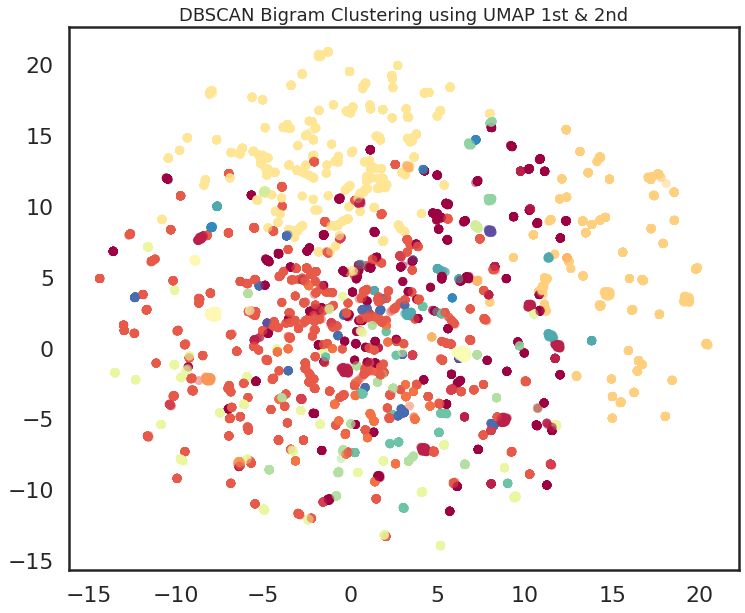

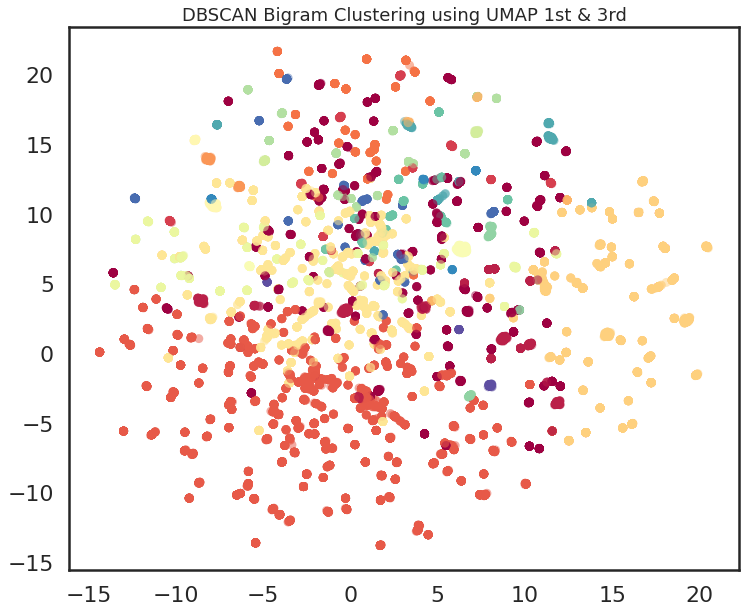

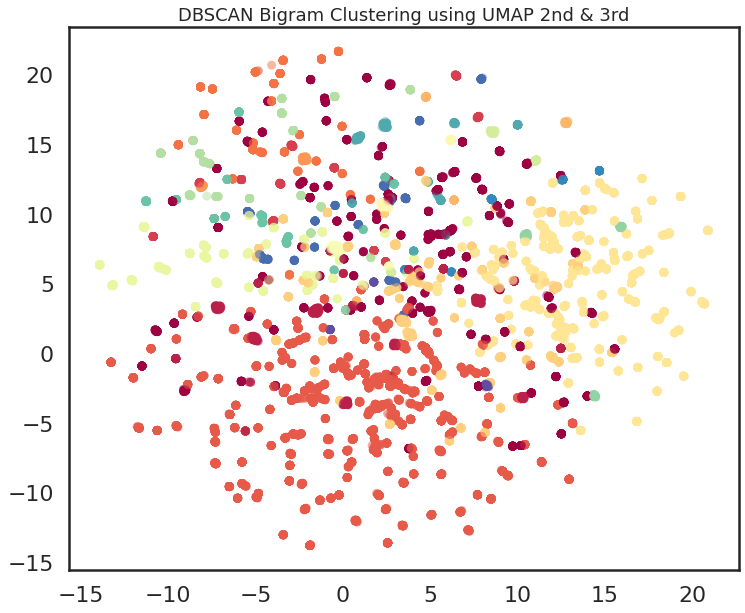

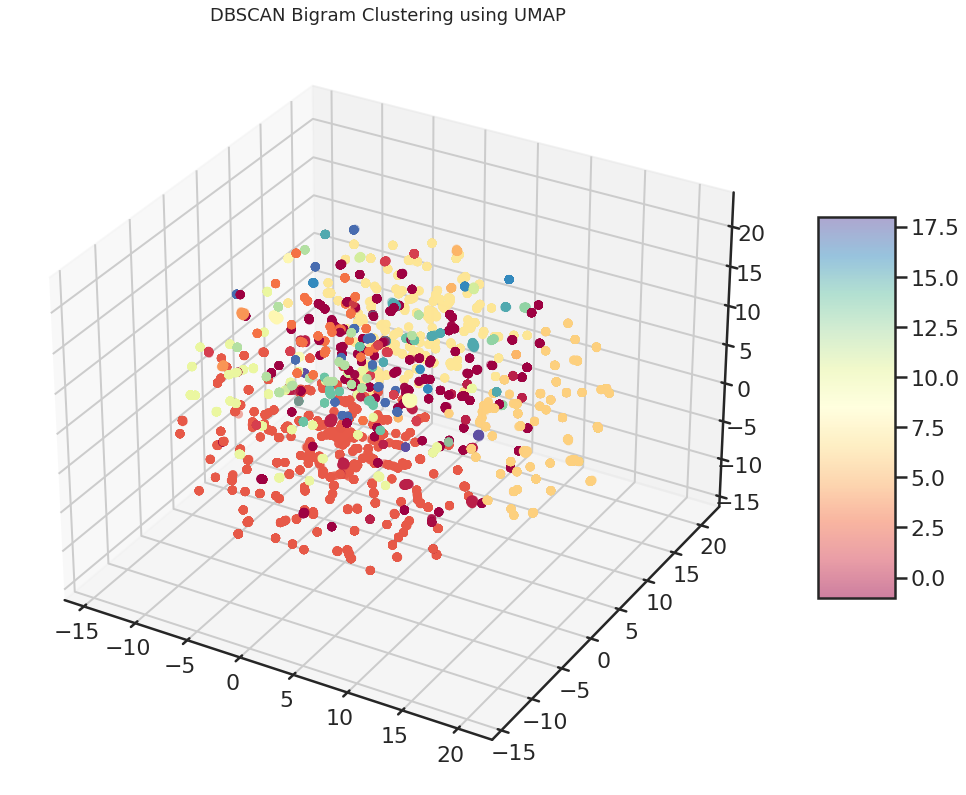

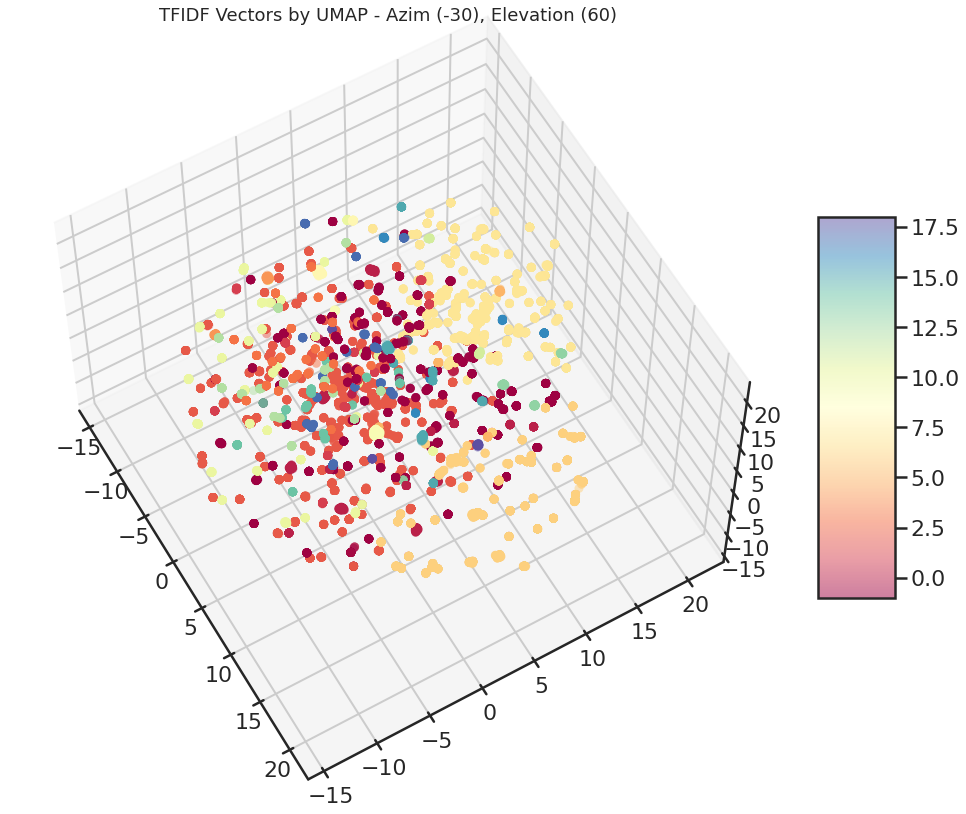

In [27]:
plot_clusters("DBSCAN Bigram Clustering using UMAP", X, labels)

In [12]:
results = evaluate_clustering('DBSCAN Bigram Clustering ', X, labels_, labels)
print(results)

['DBSCAN Bigram Clustering (400)', '0.78', '0.73', '0.75', '0.54', '0.75', '0.60']


In [13]:
eval_results.append(results)

In [14]:
np.count_nonzero(labels == -1)

3721

## Trigram Feature Vectorizer

In [15]:
labels_ = log_labels

X = get_features(logs, 3, 90)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [16]:
model = DBSCAN(eps=0.5,min_samples=100,algorithm="auto",metric="cosine")
model.fit(X)

DBSCAN(metric='cosine', min_samples=100)

In [17]:
labels = model.labels_

In [18]:
lst1 = set(labels)
lst1

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

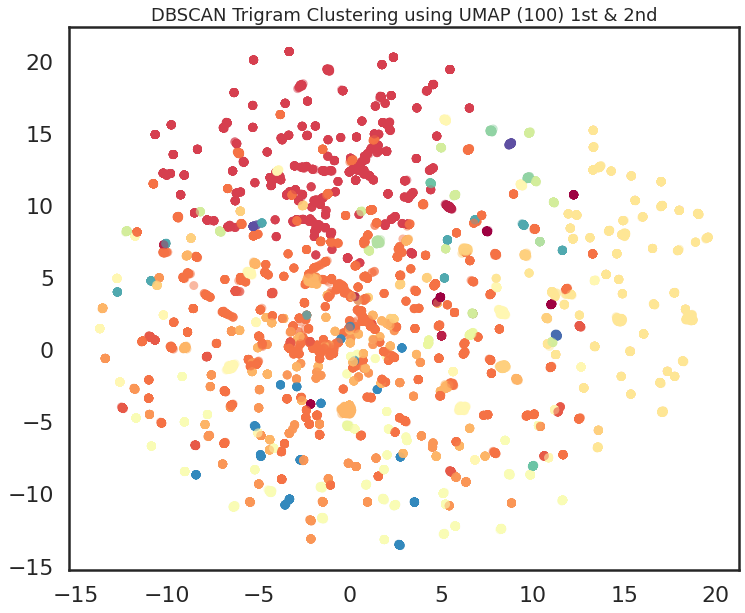

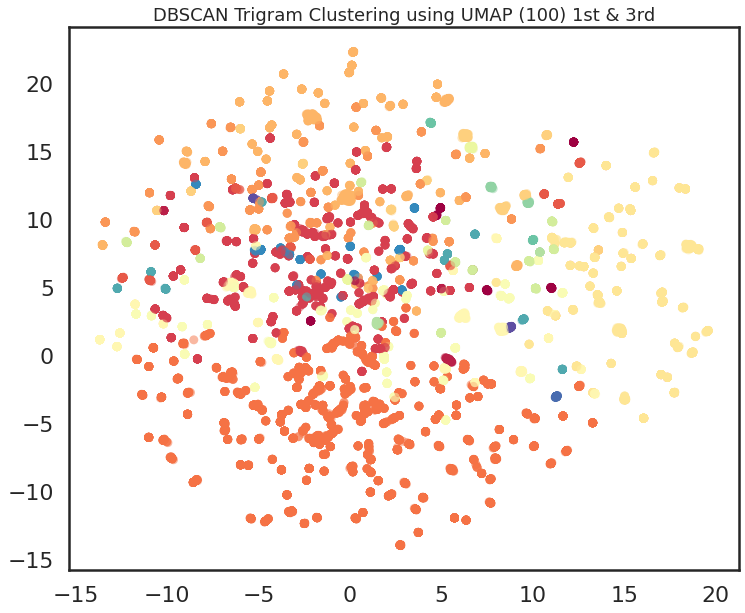

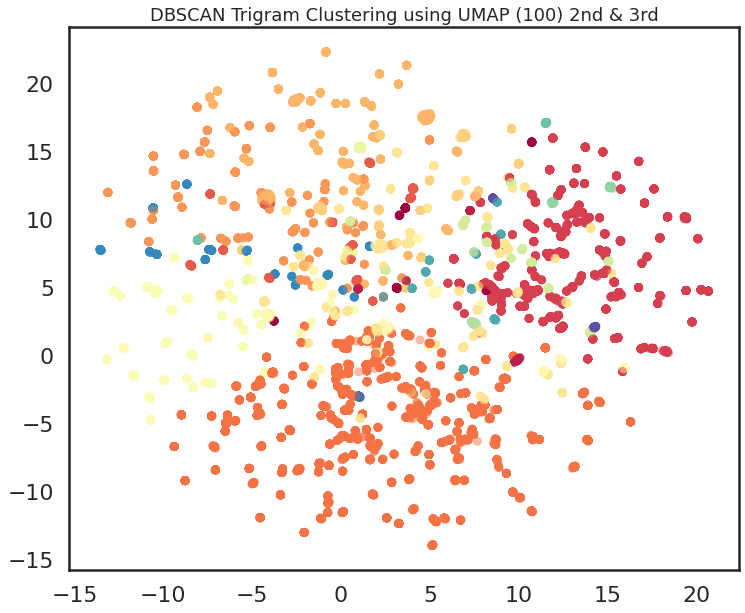

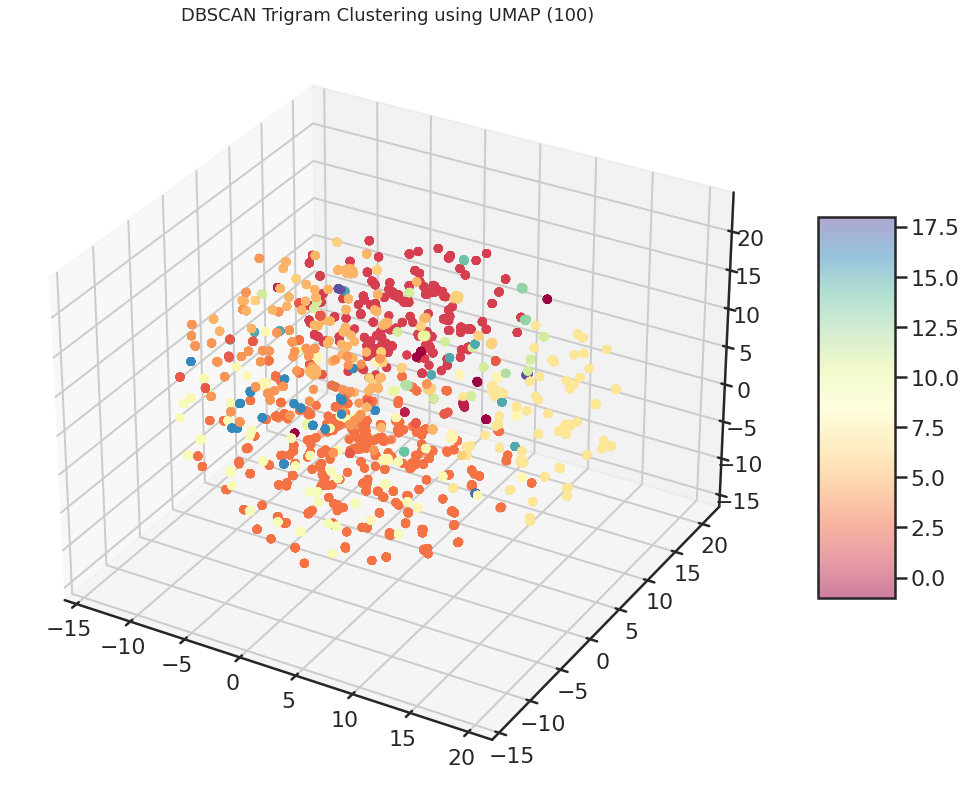

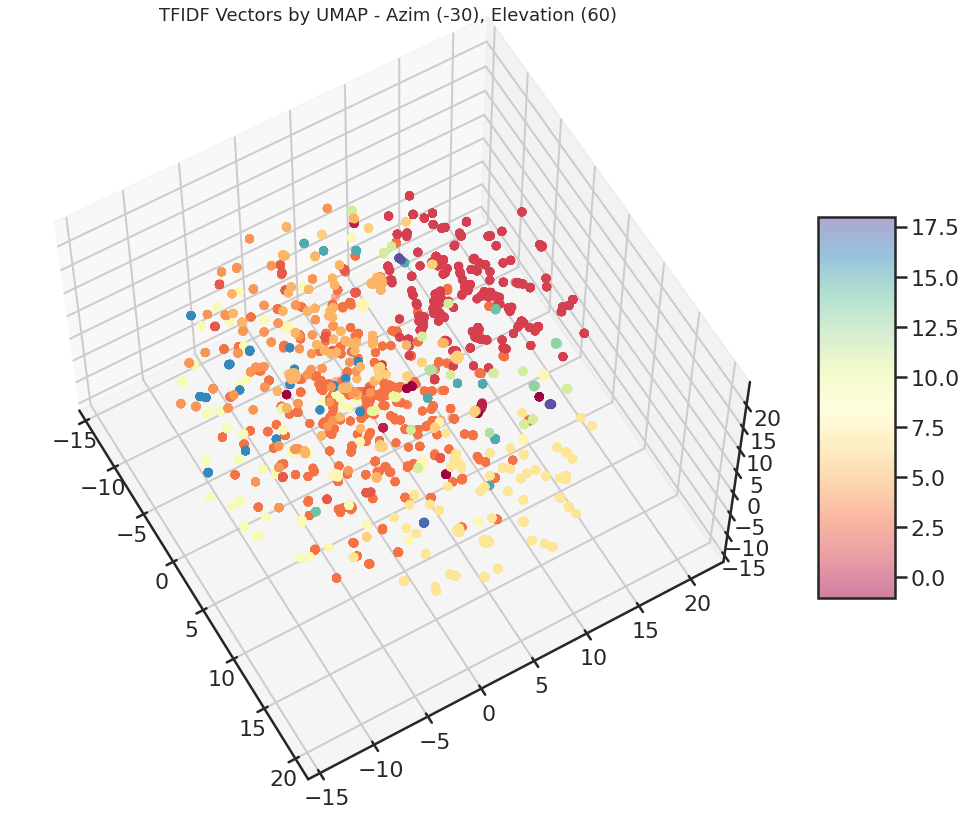

In [19]:
plot_clusters("DBSCAN Trigram Clustering using UMAP (100)", X, labels)

In [20]:
results = evaluate_clustering('DBSCAN Trigram Clustering (100)', X, labels_, labels)
print(results)

['DBSCAN Trigram Clustering (100)', '0.88', '0.82', '0.85', '0.67', '0.85', '0.71']


In [21]:
eval_results.append(results)

In [22]:
tabulate_results(eval_results)

+---------------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
|               Name              | Homogeneity | Completeness | V Measure | Adj Rand Score | Norm Mutual Score | Fowlkes Mallows |
+---------------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
|  DBSCAN Bigram Clustering (400) |     0.78    |     0.73     |    0.75   |      0.54      |        0.75       |       0.60      |
| DBSCAN Trigram Clustering (100) |     0.88    |     0.82     |    0.85   |      0.67      |        0.85       |       0.71      |
+---------------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
